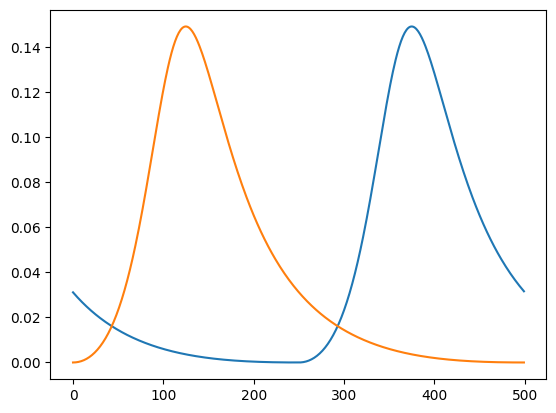

In [1]:
import numpy as np
n = 500
x0 = n * 0.5
x = np.arange(n)
from matplotlib import pyplot as plt

y = 10000 / (1000 + (x - x0)**2 + 0.04 * (x - x0*0.2)**3)
w = 0.5 - 0.5 * np.cos(x / n * 2 *  np.pi)
z2 = w * y
from numpy import fft as fft
z = fft.fftshift(z2)
plt.plot(x, z, x, z2)

In [2]:
Z = fft.fft(z)
print(n, fft.fft(z).shape, fft.rfft(z).shape, "expected full", n, "expected without redundancy", n//2 + 1)

500 (500,) (251,) expected full 500 expected without redundancy 251


In [3]:
def wavenum(i) : return (i + n // 2) % n - n // 2

In [4]:
omega = 1. / np.exp(2j / n * np.pi)

k = -3

F_comp = np.dot(z, omega ** (np.arange(n) * k))
F_expected = Z[(n + k) % n]

print("expected", F_expected)
print("computed", F_comp)

expected (0.11662251184224993+3.722309961257211j)
computed (0.11662251184234992+3.7223099612569146j)


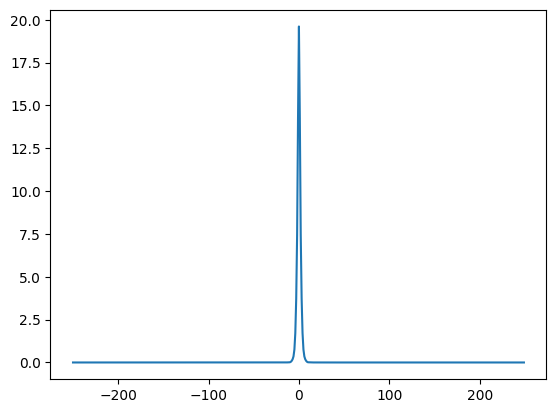

In [5]:
plt.plot(np.arange(n) - n//2, fft.fftshift(np.abs(Z)))